In [2]:
# to import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(15, 8)})

In [3]:
# to choose a dataset from Seaborn library

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
# to import diamonds dataset and check info

dd = sns.load_dataset('diamonds')
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
# first five rows of the dataframe

dd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# to create new dataframe grouped by clarity computing average carat and price

dd2 = dd.groupby('clarity', as_index=False, observed=False)[['carat', 'price']].mean()
dd2 

,clarity,carat,price
0,IF,0.505123,2864.839106
1,VVS1,0.503321,2523.114637
2,VVS2,0.596202,3283.737071
3,VS1,0.727158,3839.455391
4,VS2,0.763935,3924.989395
5,SI1,0.850482,3996.001148
6,SI2,1.077648,5063.028606
7,I1,1.283846,3924.168691


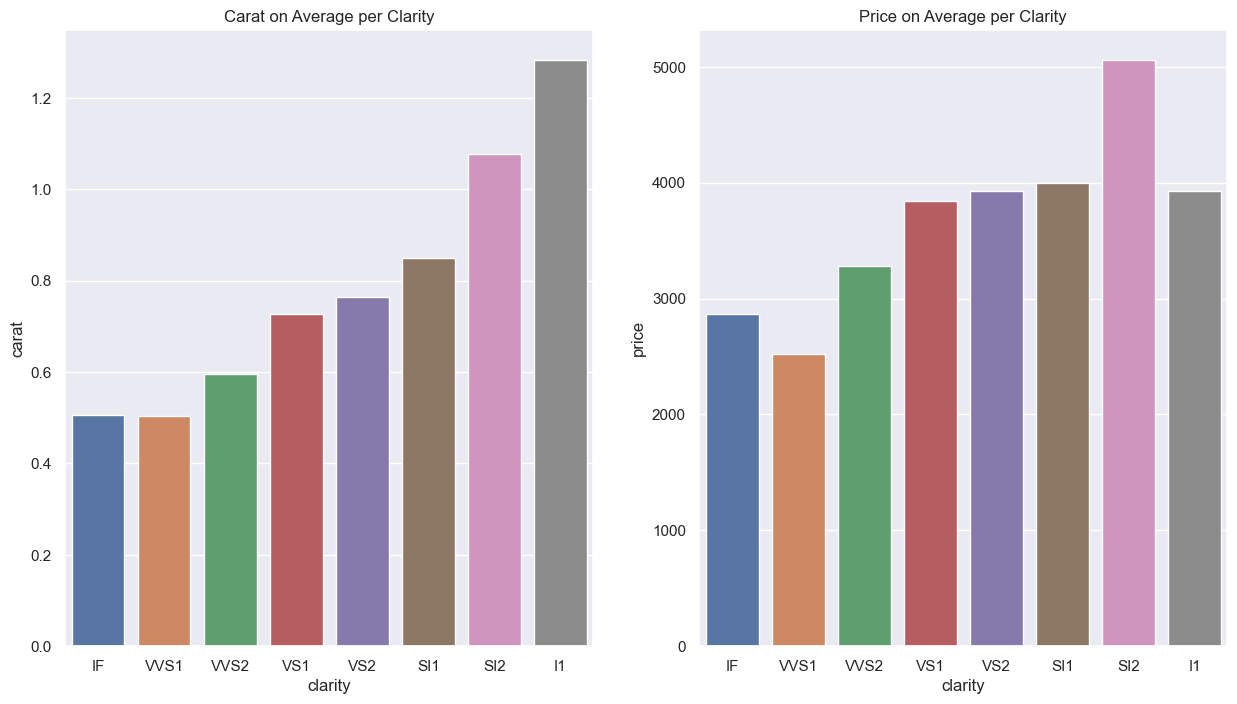

In [7]:
# bar chart showing average price per clarity and average carat per clarity

fig, ax = plt.subplots(1, 2)
first_plot = sns.barplot(x='clarity', y='carat', data=dd2, hue='clarity', ax=ax[0])
first_plot.set_title(label='Carat on Average per Clarity')
second_plot = sns.barplot(x='clarity', y='price', data=dd2, hue='clarity', ax=ax[1])
second_plot.set_title(label='Price on Average per Clarity')
plt.show()

# let's see how the more is the clarity diamond the less are its carats
# so that the highest price on average is that of categories with less clarity but bigger size

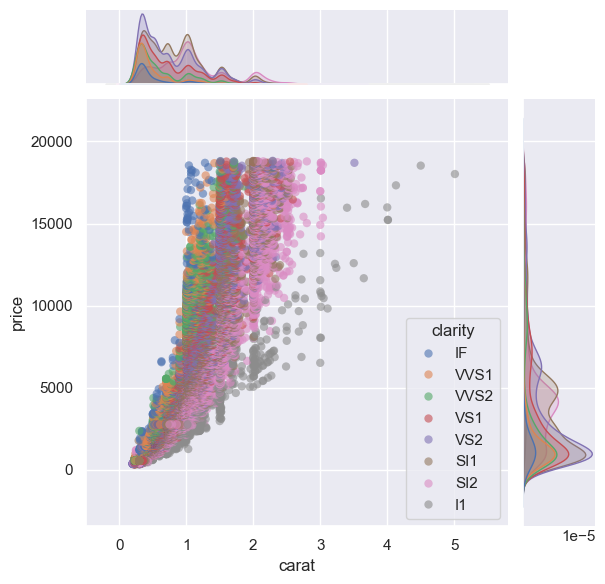

In [8]:
# jointplot showing the relationship between carat and price per clarity

sns.jointplot(x='carat', y='price', data=dd, hue='clarity', linewidth=0, alpha=0.6)
plt.show()

# the higher the purity of the diamond, the faster its price growth compared to carats
# the larger a stone, the lower its clarity

In [9]:
# to load taxis dataset from seaborn library and check its info

taxi = sns.load_dataset('taxis')
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [10]:
# to create new columns: pickup_date, pickup_weekday (monday is 0), pickup_hour

taxi['pickup_date'] = taxi['pickup'].dt.date
taxi['pickup_weekday'] = taxi['pickup'].dt.weekday
taxi['pickup_hour'] = taxi['pickup'].dt.hour
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_weekday,pickup_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,5,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,0,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,2,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,6,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,5,13


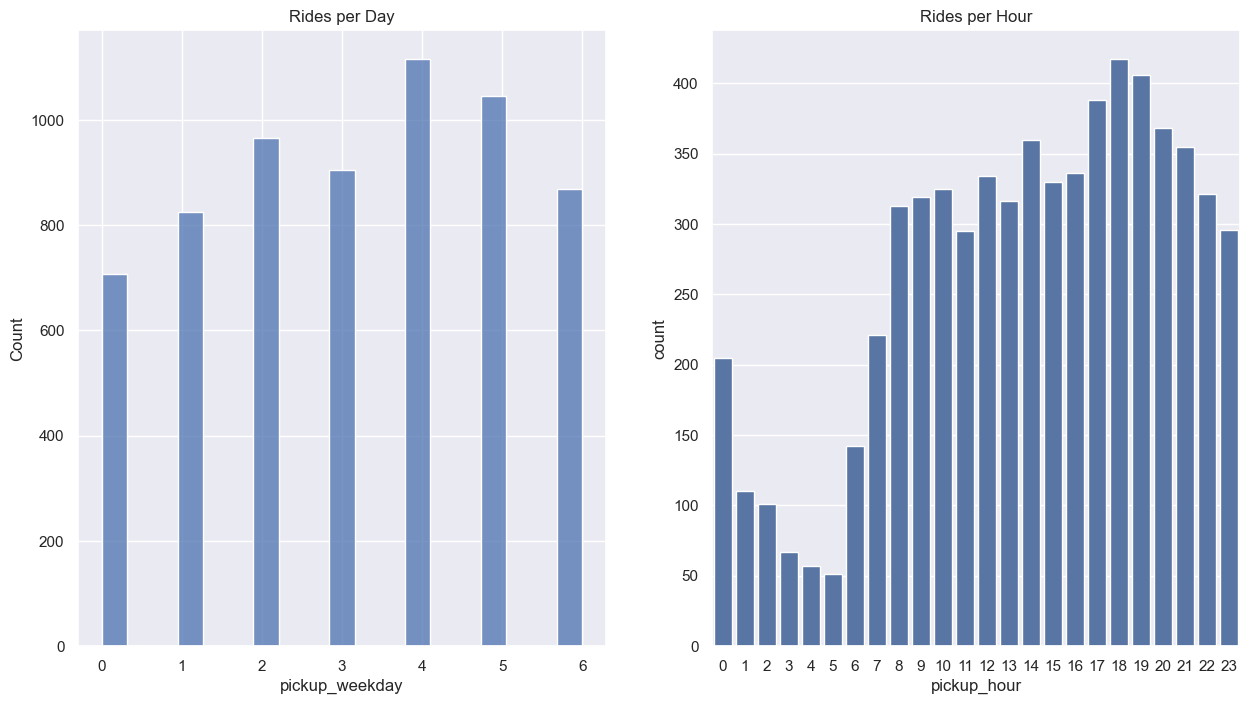

In [11]:
# barchart showing number of rides for each day of the week and number of rides per hour of the day
fis, ax = plt.subplots(1, 2)
sns.histplot(x='pickup_weekday', data=taxi, ax=ax[0]).set(title='Rides per Day')
sns.countplot(x='pickup_hour', data=taxi, ax=ax[1]).set(title='Rides per Hour')
plt.show()

# friday is the busiest day of the week
# 18 pm is the busiest hour of the day

In [20]:
# to create dataframe with number of rides per hour on Friday

taxi_fri = taxi[taxi['pickup_weekday'] == 4].groupby(['pickup_weekday', 'pickup_hour'], as_index=False).size()\
    .sort_values('size', ascending=False).reset_index(drop=True)
taxi_fri.head(1)

,pickup_weekday,pickup_hour,size
0,4,17,84


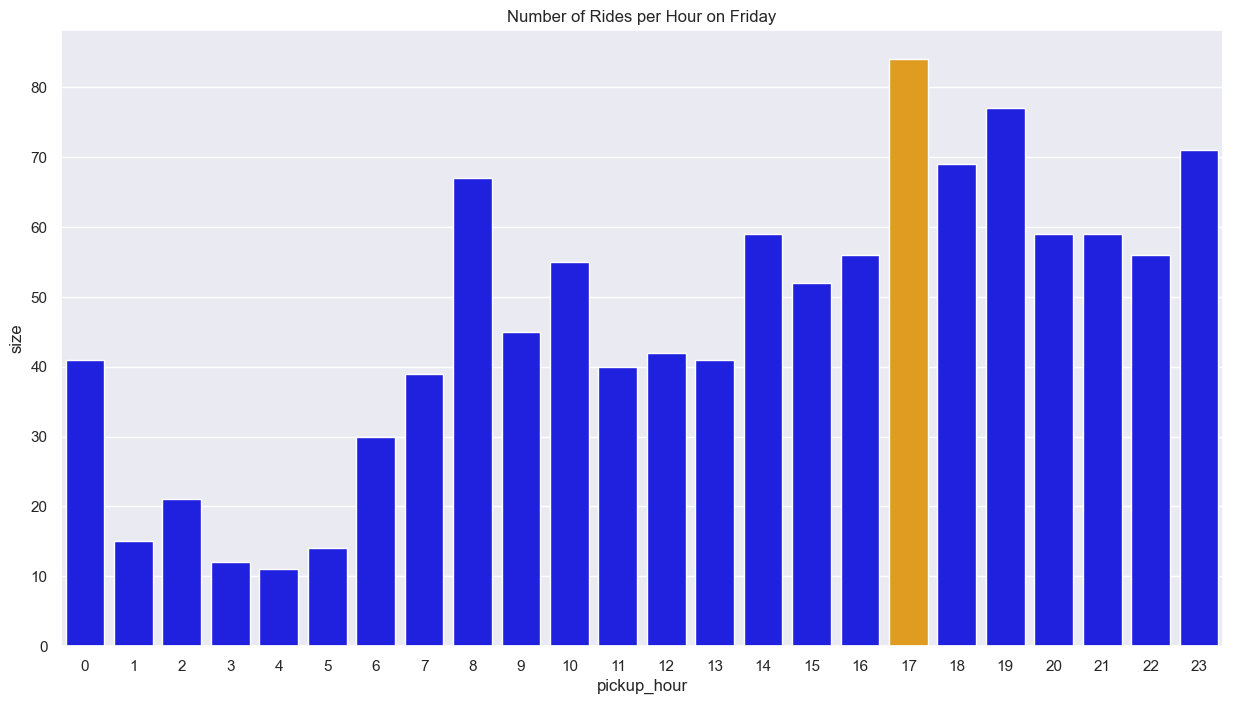

In [21]:
# barplot showing rides per hour on Friday

clr = ['orange' if el == 17 else 'blue' for el in taxi_fri['size'].index]
sns.barplot(x='pickup_hour', y='size', data=taxi_fri, hue='pickup_hour', legend=False, palette=clr).set(title='Number of Rides per Hour on Friday')
plt.show()

# result slightly differs with the last barplot, 17 pm instead of 18 pm

In [14]:
# to add a new column tip_pct (percentage of the tip relative to the fare)

taxi['tip_pct'] = taxi['tip'] / taxi['fare'] * 100
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_weekday,pickup_hour,tip_pct
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23,5,20,30.714286
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04,0,16,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27,2,17,31.466667
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10,6,1,22.777778
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30,5,13,12.222222


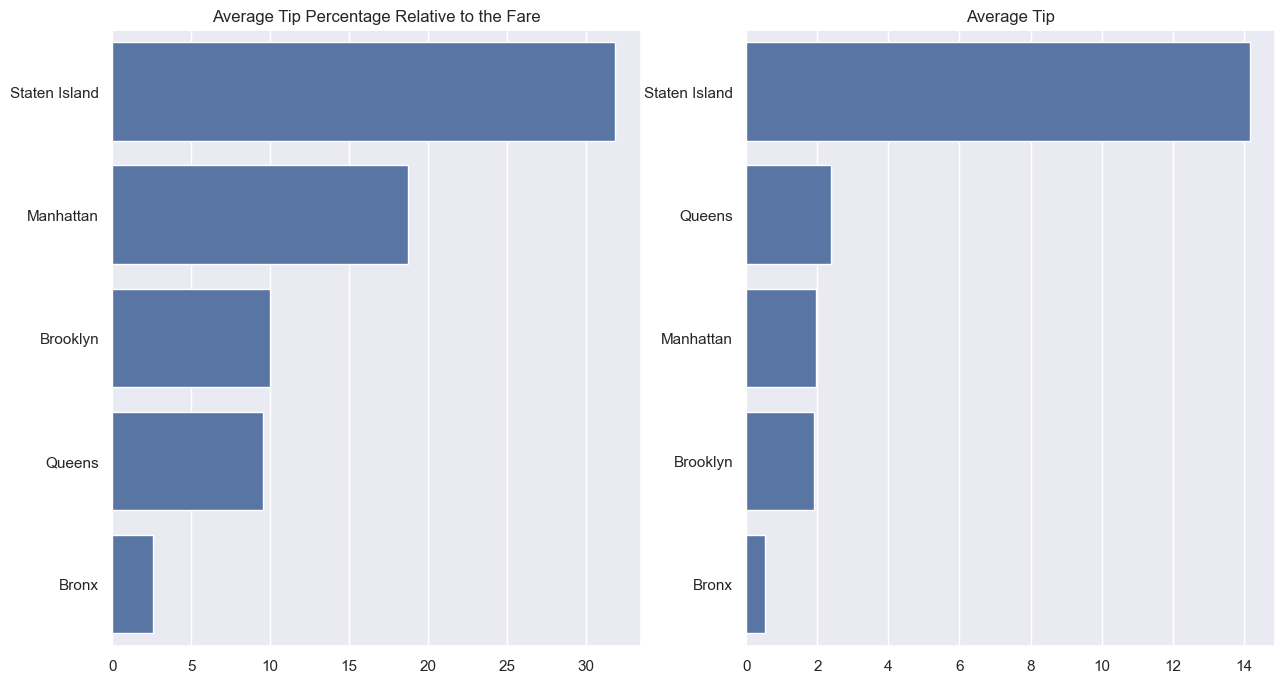

In [22]:
# barcharts showing average tip_pct by dropoff_borough and, on the right, average absolute tip
fis, ax = plt.subplots(1, 2)
taxi_grp_pct = taxi.groupby('dropoff_borough', as_index=False)['tip_pct'].mean().sort_values('tip_pct', ascending=False)
taxi_grp_abs = taxi.groupby('dropoff_borough', as_index=False)['tip'].mean().sort_values('tip', ascending=False)
sns.barplot(x='tip_pct', y='dropoff_borough', data=taxi_grp_pct, orient='h', ax=ax[0])\
    .set(title='Average Tip Percentage Relative to the Fare', xlabel='', ylabel='')
sns.barplot(x='tip', y='dropoff_borough', data=taxi_grp_abs, orient='h', ax=ax[1]).set(title='Average Tip', xlabel='', ylabel='')
plt.show()

# who gets out of the taxi in Staten Island gives the highest tip percentage and absolute tip

In [16]:
# to create taxi_tip dataframe with tip > 0

taxi_tip = taxi[taxi['tip'] > 0]

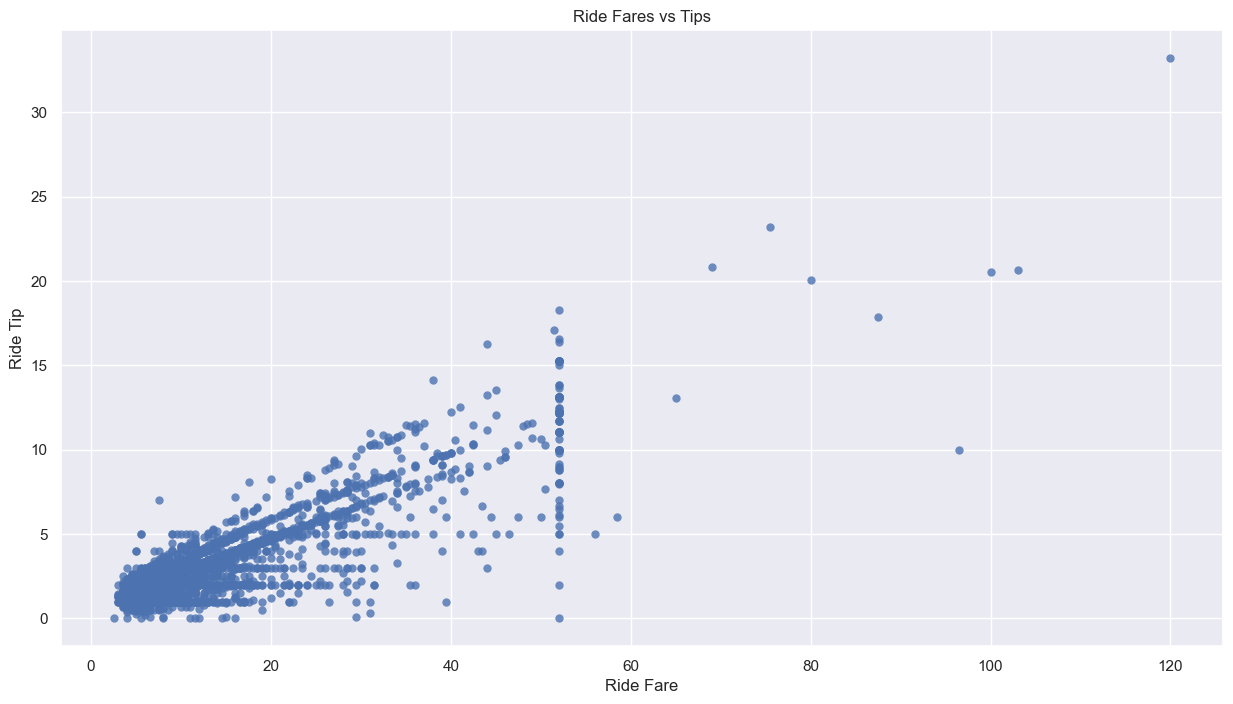

In [17]:
# scatterplot showing relationship between fare and tip

sns.scatterplot(x='fare', y='tip', data=taxi_tip, linewidth=0, alpha=0.8).set(title='Ride Fares vs Tips', xlabel='Ride Fare', ylabel='Ride Tip')
plt.show()

In [18]:
# which fare that vertical cluster is due to?

taxi_tip[(taxi_tip['fare'] > 50) & (taxi_tip['fare'] < 60)]['fare'].value_counts().head(1)

fare
52.0    101
Name: count, dtype: int64